In [ ]:
# ESSENTIAL IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import warnings

## **Importing the datasets**
It will ask to sign in with Google account. **Please give required access.** No need to change anything in code, run it as it is. This will download the 2 dataset files in the current runtime environment.


---

In [ ]:
# libraries for the files in google drive
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

dataset2_id = "1bvWKZasDHdb1y2XHKXSaRcudhFf9_aP6"
dataset3_id = '1kmbAVL24U6I2DhaBUuHlk0jYiBpzYgY5'

download2 = drive.CreateFile({'id': dataset2_id})
download3 = drive.CreateFile({'id': dataset3_id})

# Download the file to a local disc
download2.GetContentFile('dataset2.csv')
download3.GetContentFile('dataset3.csv')

## **Visualizing the Data in Dataset2**


---



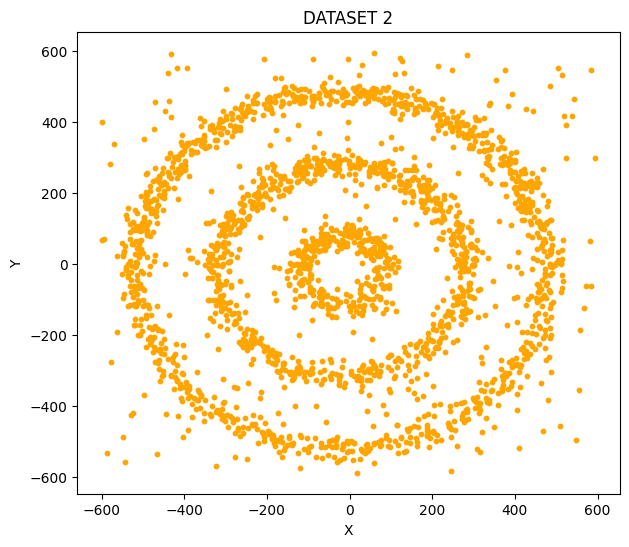

In [ ]:
dataset = pd.read_csv('/content/dataset2.csv')

fig = plt.figure(figsize=(7, 6))
plt.title('DATASET 2')
plt.scatter(dataset['0'], dataset['1'], s=10, c = "orange")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## **Elbow Method for DBSCAN eps estimation on DATASET2**

---

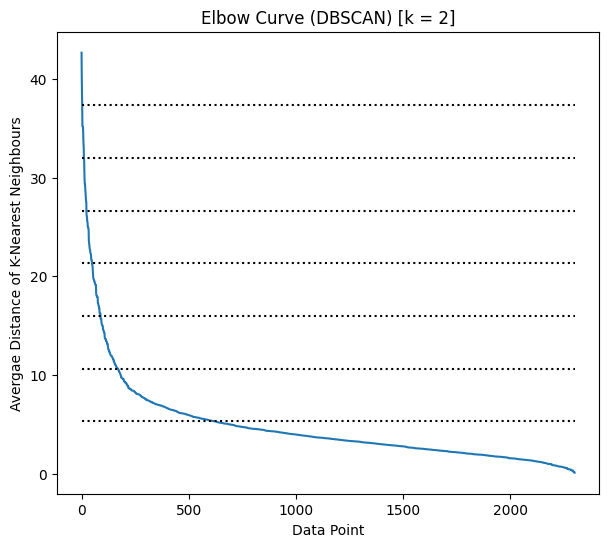

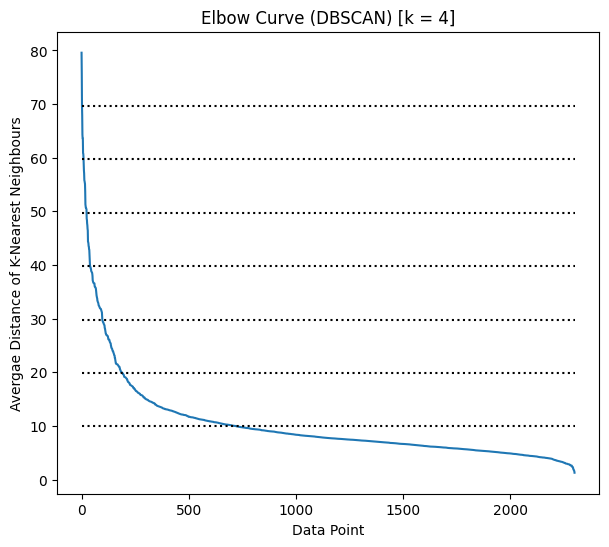

In [ ]:
from sklearn.neighbors import NearestNeighbors

minPoints = 2
dataset = pd.read_csv('/content/dataset2.csv')
nhbrs = NearestNeighbors(n_neighbors=minPoints).fit(dataset)
distances, indices = nhbrs.kneighbors(dataset)

avg_distances = np.mean(distances, axis=1)
avg_distances = np.sort(avg_distances)[::-1]

fig = plt.figure(figsize=(7, 6))
plt.plot(avg_distances)

numLines = 8
hlines = []
for i in range(1,numLines):
  hlines.append(i * avg_distances[0] / numLines)
plt.hlines(hlines,0,len(dataset),colors='k',linestyles='dotted')

plt.title('Elbow Curve (DBSCAN) [k = 2]')
plt.xlabel('Data Point')
plt.ylabel('Avergae Distance of K-Nearest Neighbours')
plt.show()


minPoints2 = 4
nhbrs2 = NearestNeighbors(n_neighbors=minPoints2).fit(dataset)
distances2, indices2 = nhbrs2.kneighbors(dataset)

avg_distances2 = np.mean(distances2, axis=1)
avg_distances2 = np.sort(avg_distances2)[::-1]

fig = plt.figure(figsize=(7, 6))
plt.plot(avg_distances2)

numLines2 = 8
hlines2 = []
for i in range(1,numLines2):
  hlines2.append(i * avg_distances2[0] / numLines2)
plt.hlines(hlines2,0,len(dataset),colors='k',linestyles='dotted')

plt.title('Elbow Curve (DBSCAN) [k = 4]')
plt.xlabel('Data Point')
plt.ylabel('Avergae Distance of K-Nearest Neighbours')
plt.show()

## **Finding Best clustering for the above optimal epsilon range**


---

In [ ]:
# DBSCAN implmentation from scratch
def dfs(pt, currentCluster, visited, core, epsilon_neighbours):
        visited[pt] = True
        currentCluster.append(pt)
        if pt not in core:
            return

        for nghbr in epsilon_neighbours[pt]:
            if visited[nghbr] == False:
                dfs(nghbr, currentCluster, visited, core, epsilon_neighbours)

def findClusters(core, visited, cluster, epsilon_neighbours):
    for pt in core:
        if visited[pt] == False:
            currentCluster = []
            dfs(pt, currentCluster, visited, core, epsilon_neighbours)
            cluster.append(currentCluster)

def dbSCAN(e, minPts):
    dataset = pd.read_csv('/content/dataset2.csv')

    data = []
    for i in range(len(dataset)):
        data.append(dataset.iloc[i])

    epsilon_neighbours = []
    core = []

    for i in range(len(data)):
        x = data[i][0]
        y = data[i][1]

        d = np.sqrt((x - dataset['0'])**2 + (y - dataset['1'])**2)
        nghbr = dataset[(d <= e)]
        nghbr = nghbr.index.tolist()

        if len(nghbr) >= minPts:
            core.append(i)

        epsilon_neighbours.append(nghbr)

    cluster = []
    visited = [False for i in range(len(dataset))]
    findClusters(core, visited, cluster, epsilon_neighbours)

    return cluster


for i in range(4,7):
    for j in range(10, 31):
        cluster = dbSCAN(j, i)
        print("e : ", j, " minPoints : ", i, " Count of clusters : ", len(cluster))


e :  10  minPoints :  4  Count of clusters :  141
e :  11  minPoints :  4  Count of clusters :  153
e :  12  minPoints :  4  Count of clusters :  161
e :  13  minPoints :  4  Count of clusters :  144
e :  14  minPoints :  4  Count of clusters :  126
e :  15  minPoints :  4  Count of clusters :  97
e :  16  minPoints :  4  Count of clusters :  79
e :  17  minPoints :  4  Count of clusters :  55
e :  18  minPoints :  4  Count of clusters :  40
e :  19  minPoints :  4  Count of clusters :  35
e :  20  minPoints :  4  Count of clusters :  23
e :  21  minPoints :  4  Count of clusters :  18
e :  22  minPoints :  4  Count of clusters :  11
e :  23  minPoints :  4  Count of clusters :  7
e :  24  minPoints :  4  Count of clusters :  6
e :  25  minPoints :  4  Count of clusters :  4
e :  26  minPoints :  4  Count of clusters :  4
e :  27  minPoints :  4  Count of clusters :  4
e :  28  minPoints :  4  Count of clusters :  4
e :  29  minPoints :  4  Count of clusters :  4
e :  30  minPoints :  

## **Plotting Best clustering for the above optimal epsilon range**


---

Clusters :  3


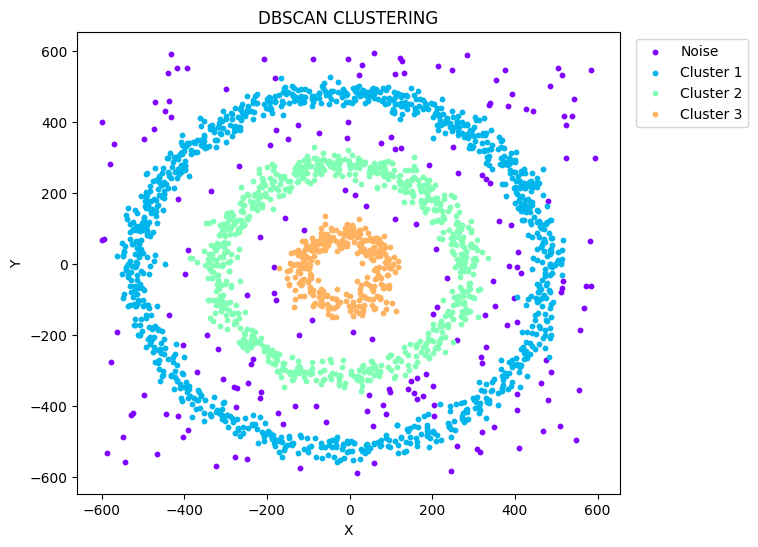

In [ ]:
# DBSCAN implmentation from scratch
def dfs(pt, currentCluster, visited, core, epsilon_neighbours):
        visited[pt] = True
        currentCluster.append(pt)
        if pt not in core:
            return

        for nghbr in epsilon_neighbours[pt]:
            if visited[nghbr] == False:
                dfs(nghbr, currentCluster, visited, core, epsilon_neighbours)

def findClusters(core, visited, cluster, epsilon_neighbours):
    for pt in core:
        if visited[pt] == False:
            currentCluster = []
            dfs(pt, currentCluster, visited, core, epsilon_neighbours)
            cluster.append(currentCluster)

def dbSCAN(e, minPts):
    dataset = pd.read_csv('/content/dataset2.csv')

    data = []
    for i in range(len(dataset)):
        data.append(dataset.iloc[i])

    epsilon_neighbours = []
    core = []

    for i in range(len(data)):
        x = data[i][0]
        y = data[i][1]

        d = np.sqrt((x - dataset['0'])**2 + (y - dataset['1'])**2)
        nghbr = dataset[(d <= e)]
        nghbr = nghbr.index.tolist()

        if len(nghbr) >= minPts:
            core.append(i)

        epsilon_neighbours.append(nghbr)

    cluster = []
    visited = [False for i in range(len(dataset))]
    findClusters(core, visited, cluster, epsilon_neighbours)

    return cluster

# Optimal Values : minPoints : 28, epsilon : 5
cluster = dbSCAN(28, 5)
print("Clusters : ", len(cluster))

dataset = pd.read_csv('/content/dataset2.csv')

cluster_label = [-1] * len(dataset)
for i in range(len(cluster)):
    for j in range(len(cluster[i])):
        cluster_label[cluster[i][j]] = i + 1

fig = plt.figure(figsize=(7, 6))
for i in np.unique(cluster_label):
    plt.scatter(dataset['0'][cluster_label == i], dataset['1'][cluster_label == i], c = np.array([cm.rainbow(i/len(np.unique(cluster_label)))]) ,s=10)

plt.title('DBSCAN CLUSTERING')
plt.legend(['Noise'] + [f"Cluster {clust}" for clust in np.unique(cluster_label)][1:], loc = 'upper right', bbox_to_anchor=(1.25, 1))
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## **K-MEANS Clustering**


---


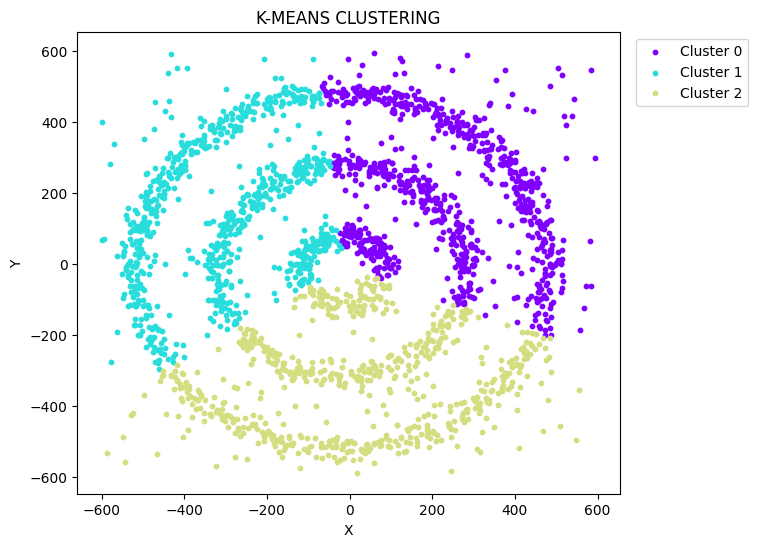

In [ ]:
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore', category=FutureWarning)
dataset = pd.read_csv('/content/dataset2.csv',)

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(dataset)

fig = plt.figure(figsize=(7, 6))
for i in np.unique(y_kmeans):
    plt.scatter(dataset['0'][y_kmeans == i], dataset['1'][y_kmeans == i], c = np.array([cm.rainbow(i/len(np.unique(y_kmeans)))]) ,s=10)

plt.title('K-MEANS CLUSTERING')
plt.legend([f"Cluster {clust}" for clust in np.unique(y_kmeans)], loc = 'upper right', bbox_to_anchor=(1.25, 1))
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## **Improving K-Means**

----

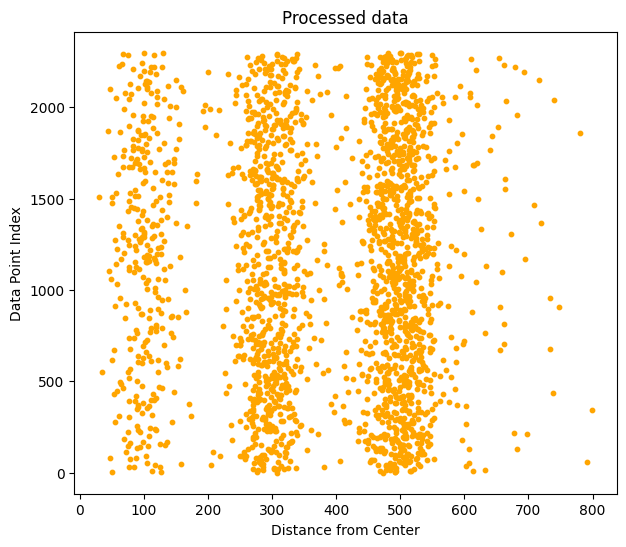

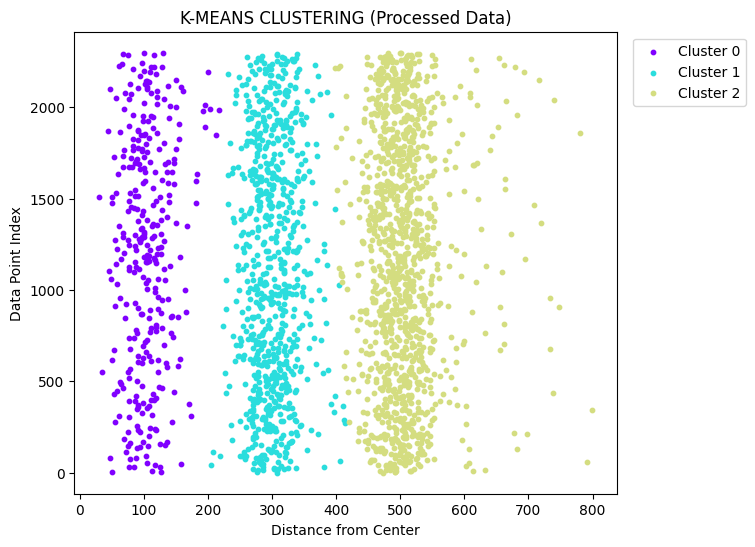

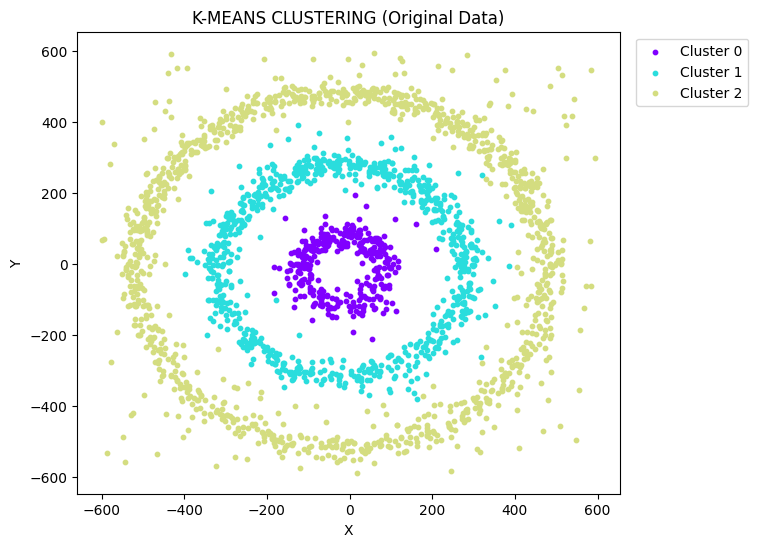

In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from scipy.linalg import inv

warnings.filterwarnings('ignore', category=FutureWarning)
dataset = pd.read_csv('/content/dataset2.csv')

def distance_from_center(x, y, cx, cy):
    return np.sqrt((x-cx)**2 + (y-cy)**2)

distances = distance_from_center(dataset['0'], dataset['1'], 0, 0)

#create  aarary of zero for len(distances)
new_dataset = np.zeros((len(distances), 2))
for i in range(len(distances)):
    new_dataset[i] = [distances[i], i]

new_dataset = new_dataset.T

fig = plt.figure(figsize=(7, 6))
plt.scatter(new_dataset[0], new_dataset[1], s=10, c="orange")
plt.title("Processed data")
plt.xlabel("Distance from Center")
plt.ylabel("Data Point Index")
plt.show()


def kmeans_mahalanobis(X, k, max_iter=100):
    n_samples, n_features = X.shape
    mid = len(X)/2
    centroids = np.array([[100, mid], [300, mid], [500, mid]])

    for i in range(max_iter):
        distance = cdist(X, centroids, metric='mahalanobis', VI=inv(np.cov(X.T)))
        labels = np.argmin(distance, axis=1)
        for j in range(k):
            centroids[j] = np.mean(X[labels == j], axis=0)

    return labels, centroids

labels, centroids = kmeans_mahalanobis(new_dataset.T, 3)

fig = plt.figure(figsize=(7, 6))
for i in np.unique(labels):
    plt.scatter(new_dataset[0][labels == i], new_dataset[1][labels == i], c = np.array([cm.rainbow(i/len(np.unique(labels)))]) ,s=10)

plt.title('K-MEANS CLUSTERING (Processed Data)')
plt.legend([f"Cluster {clust}" for clust in np.unique(labels)], loc = 'upper right', bbox_to_anchor=(1.25, 1))
plt.xlabel("Distance from Center")
plt.ylabel("Data Point Index")
plt.show()


fig = plt.figure(figsize=(7, 6))
for i in np.unique(labels):
    plt.scatter(dataset['0'][labels == i], dataset['1'][labels == i], c = np.array([cm.rainbow(i/len(np.unique(labels)))]) ,s=10)

plt.title('K-MEANS CLUSTERING (Original Data)')
plt.legend([f"Cluster {clust}" for clust in np.unique(labels)], loc = 'upper right', bbox_to_anchor=(1.25, 1))
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## **Visualizing the Data in Dataset3**


---

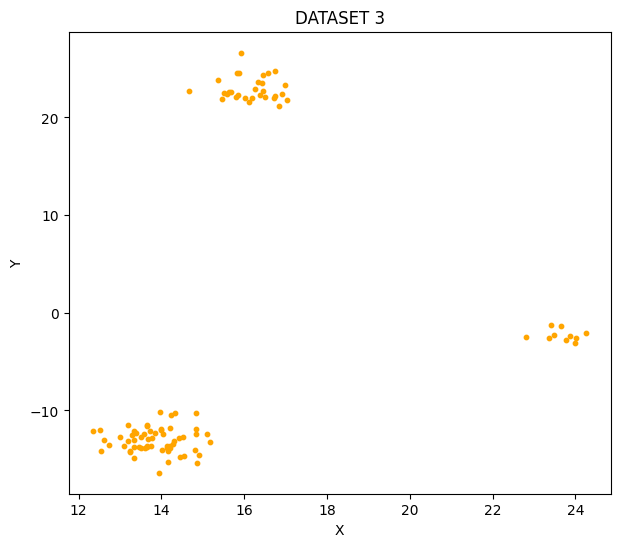

In [ ]:
dataset = pd.read_csv('/content/dataset3.csv')

fig = plt.figure(figsize=(7, 6))
plt.title('DATASET 3')
plt.scatter(dataset['0'], dataset['1'], s=10, c = "orange")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## **Elbow Method for DBSCAN eps estimation on DATASET3**

---

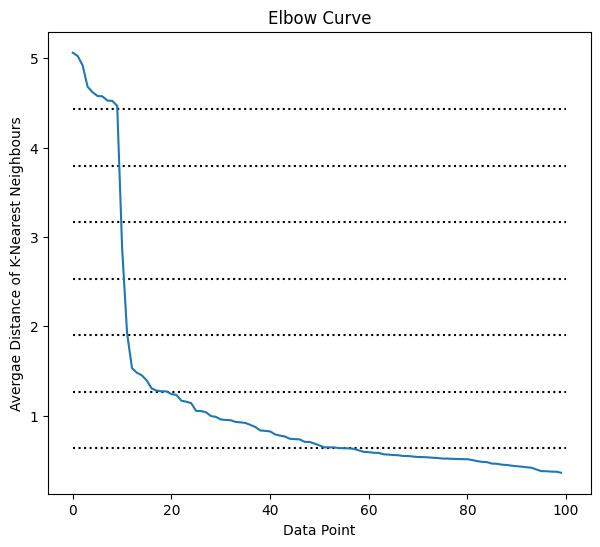

In [ ]:
from sklearn.neighbors import NearestNeighbors

minPoints = 15
dataset = pd.read_csv('/content/dataset3.csv')
nhbrs = NearestNeighbors(n_neighbors=minPoints).fit(dataset)
distances, indices = nhbrs.kneighbors(dataset)

avg_distances = np.mean(distances, axis=1)
avg_distances = np.sort(avg_distances)[::-1]

fig = plt.figure(figsize=(7, 6))
numLines = 8
hlines = []
for i in range(1,numLines):
  hlines.append(i * avg_distances[0] / numLines)
plt.hlines(hlines,0,len(dataset),colors='k',linestyles='dotted')

plt.plot(avg_distances)
plt.title('Elbow Curve')
plt.xlabel('Data Point')
plt.ylabel('Avergae Distance of K-Nearest Neighbours')
plt.show()

## **Finding Best clustering for the above optimal epsilon range**


---

Clusters :  2


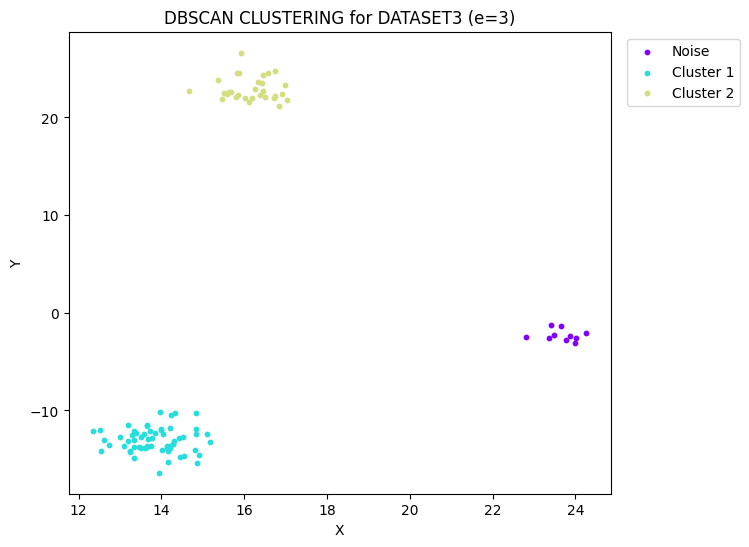

In [ ]:
# DBSCAN implmentation from scratch
def dfs(pt, currentCluster, visited, core, epsilon_neighbours):
        visited[pt] = True
        currentCluster.append(pt)
        if pt not in core:
            return

        for nghbr in epsilon_neighbours[pt]:
            if visited[nghbr] == False:
                dfs(nghbr, currentCluster, visited, core, epsilon_neighbours)

def findClusters(core, visited, cluster, epsilon_neighbours):
    for pt in core:
        if visited[pt] == False:
            currentCluster = []
            dfs(pt, currentCluster, visited, core, epsilon_neighbours)
            cluster.append(currentCluster)

def dbSCAN(e, minPts):
    dataset = pd.read_csv('/content/dataset3.csv')

    data = []
    for i in range(len(dataset)):
        data.append(dataset.iloc[i])

    epsilon_neighbours = []
    core = []

    for i in range(len(data)):
        x = data[i][0]
        y = data[i][1]

        d = np.sqrt((x - dataset['0'])**2 + (y - dataset['1'])**2)
        nghbr = dataset[(d <= e)]
        nghbr = nghbr.index.tolist()

        if len(nghbr) >= minPts:
            core.append(i)

        epsilon_neighbours.append(nghbr)

    cluster = []
    visited = [False for i in range(len(dataset))]
    findClusters(core, visited, cluster, epsilon_neighbours)

    return cluster

# Given Value : minPoints : 15
# Optimal value : epsilon : 3
cluster = dbSCAN(3, 15)
print("Clusters : ", len(cluster))

dataset = pd.read_csv('/content/dataset3.csv')

cluster_label = [-1] * len(dataset)
for i in range(len(cluster)):
    for j in range(len(cluster[i])):
        cluster_label[cluster[i][j]] = i + 1

fig = plt.figure(figsize=(7, 6))
for i in np.unique(cluster_label):
    plt.scatter(dataset['0'][cluster_label == i], dataset['1'][cluster_label == i], c = np.array([cm.rainbow(i/len(np.unique(cluster_label)))]) ,s=10)

plt.title('DBSCAN CLUSTERING for DATASET3 (e=3)')
if -1 in cluster_label:
  plt.legend(['Noise'] + [f"Cluster {clust}" for clust in np.unique(cluster_label)][1:], loc = 'upper right', bbox_to_anchor=(1.25, 1))
else:
  plt.legend([f"Cluster {clust}" for clust in np.unique(cluster_label)], loc = 'upper right', bbox_to_anchor=(1.25, 1))
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## **K-MEANS Clustering (K = 3)**


---

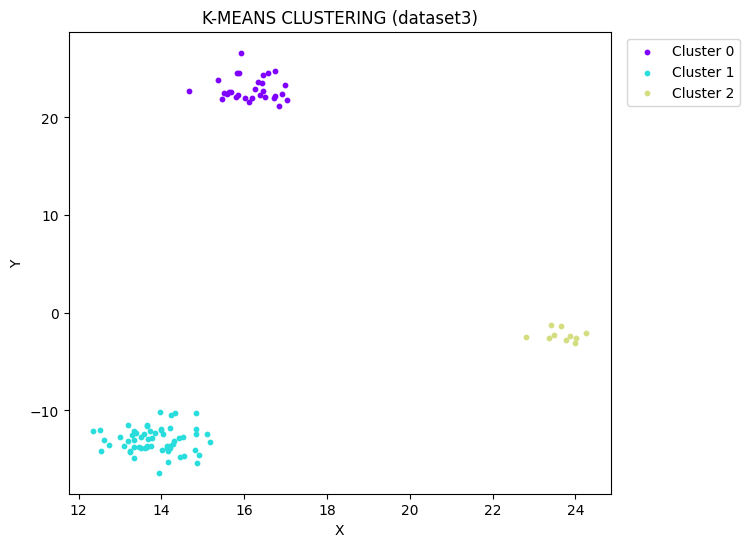

In [ ]:
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore', category=FutureWarning)
dataset = pd.read_csv('/content/dataset3.csv')

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(dataset)

fig = plt.figure(figsize=(7, 6))
for i in np.unique(y_kmeans):
    plt.scatter(dataset['0'][y_kmeans == i], dataset['1'][y_kmeans == i], c = np.array([cm.rainbow(i/len(np.unique(y_kmeans)))]), s =10)

plt.title('K-MEANS CLUSTERING (dataset3)')
plt.legend([f"Cluster {clust}" for clust in np.unique(y_kmeans)], loc = 'upper right', bbox_to_anchor=(1.25, 1))
plt.xlabel('X')
plt.ylabel('Y')
plt.show()